**<center><b>Report: Movie Review Binary Classification</b></center>**

This paper describes the creation of a Keras neural network for binary categorization of movie reviews from the IMDB movie reviews dataset. The neural network's aim is to identify whether an evaluation is favorable or negative.



<u>**Problem Statment:**</u>

The objective of this project is to use Keras to build a deep neural network to predict whether a review will be positive or negative.



<u>**Dataset:**</u>


The IMDB dataset contains 50,000 highly polarized movie reviews that have been split into two equal groups of 25,000 reviews each for training and testing. There are an equal amount of favorable and negative evaluations in each set. Keras includes this dataset, which contains reviews and the labels that go with them, with 0 indicating a negative review and 1 reflecting a good review. The evaluations take the shape of a series of words that have been pre-processed into a series of numbers, each integer signifying a different word from the dictionary.


<u>**Methodology:**</u>

To create the neural network, we used Python's Keras framework. First, the dataset was split into training and test groups. The data was then loaded, with only the 10,000 most commonly appearing terms retained. The evaluations were then decoded to their original text using a lexicon mapping from word to integer value.



A sequential model was then developed, consisting of an embedding layer that takes the integer-encoded vocabulary and translates each word to a feature vector of a given size. This was followed by a dense layer with 16 hidden units and the ReLU activation function, which was then linked to an output layer with a sigmoid activation function to generate a chance between 0 and 1. The model was built with binary cross-entropy as the loss function, the RMSprop optimizer, and accuracy as the assessment measure.




Loading the IMDB dataset

In [ ]:
# importing libraries

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from keras import models
from keras import layers

Dataset is divided into train data and test data

Data is loaded and 10,000 most frequently occuring words are kept

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


Printing training data first review



In [ ]:
train_data[0]


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
# Check the first label

train_labels[0]


1

In [ ]:
# 10000 frequent words are taken into account and  word index should not be exceeded to the frequent word count.

# Finding the max of all the max indexes
max([max(sequence) for sequence in train_data])

9999

Decoding movie reviews back to text



In [ ]:
#Loading the mappings from word to integer index and reverse the word index to integer  and then decode the review by mapping integer to word

# step 1: Load the mappings of the dictionary from the word to integer index
word_index = imdb.get_word_index()

# step 2: reverse word index to integer mapping 
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

# step 3: Decode the review, mapping integer to words
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
decoded_review

1641221/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
len(reverse_word_index)

88584

**<u>Preparing the data:</u>**


* Our deep convolutional neural network cannot be provided a list of numbers. We'll have to transform them into tensors.
* To prepare our data, we'll use One-hot Encoding to transform our lists into vectors of 0s and 1s. Each of our sequences would be blown up into 10,000-dimensional vectors with 1 at all positions connecting all numbers in the sequence. 
* This vector will contain the element 0 for all values that are not in integer order.Simply put, each evaluation will be symbolized by a 10,000-dimensional vector.Each index correlates to a particular phrase.
* Every index with the value 1 indicates a term in the review that is marked by its integer equivalent. Every number that begins with 0 is a name.



In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))                   
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1                                 
    return results

# Vectorizing the training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
x_train.shape


(25000, 10000)

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

<u>**Making the model:**</u>

Our initial dataset was made up of vectors that needed to be transformed to encoder labels (0s and 1s). This is one of the most fundamental configurations, and a basic stack of completely linked Dense layers with relu activation works well.

<u>**Hidden Layers:**</u>

* In this network, we'll use concealed levels. As a result, we'll categorize our levels.

* Dense(16,'relu' activation) The parameter given to each Dense layer specifies the number of concealed units of a layer (16).

* The output of a Dense layer with relu activation is produced after a sequence of tensor processes. The following is how this procedure is carried out:

* relu(dot(W, input) Plus b) output W is the weight matrix, and b is the skew (tensor).

* If there are 16 concealed units, the matrix W will have the form (_inputDimension, 16). The dimension of the input vector in this situation is 10,000, and the construction of the Weight matrix is (10000, 16). If this network were depicted as a graph, it would have 16 nodes.

<u>**Architecture of the Model**</u>

We will be utilizing the for our example.

* Two intermediary levels, each with 16 hidden layers, employ the relu activation function, which is used to zero out negative numbers.

* The output layer, which employs sigmoid activation, will be the third layer

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

<b>**Compiling the model:**</b>

We will look at the optimizer, loss function, and data during the compilation phase.

The following methods will be used in this case.

* The binary crossentropy loss function is employed in binary categorization.
rmsprop is the algorithm used.
* Accuracy is used to assess success.
* Because keras includes all of the rmsprop, binary crossentropy, and accuracy functions, the above methods can be used to build the model.

model.compile(rmsprop, loss="binary crossentropy", metrics="accuracy"])



In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

**<b>Setting aside a validation set</b>**

We'll save some of our training data to test the model's accuracy as it advances. A validation set enables businesses to track our model's development through epochs during training on previously unknown data.

* We can fine-tune the model's training settings using validation stages.

* To avoid data overfitting and underfitting, use the fit tool.



In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**<b>Training the model</b>**

For the first 20 epochs, we'll train our models in 512-sample mini-batches. Our confirmation collection will also be used by the fit technique.

When invoked, the fit method will return a History object. This object has a member history that contains all training process information, including the values of visible or tracked quantities as the epochs advance. This object will be saved so that we can better determine how to fine-tune the training process.



In [ ]:

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 74ms/step - loss: 0.5250 - accuracy: 0.7859 - val_loss: 0.4109 - val_accuracy: 0.8490
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3291 - accuracy: 0.8950 - val_loss: 0.3196 - val_accuracy: 0.8829
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2505 - accuracy: 0.9179 - val_loss: 0.2872 - val_accuracy: 0.8878
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2045 - accuracy: 0.9321 - val_loss: 0.2773 - val_accuracy: 0.8897
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1704 - accuracy: 0.9442 - val_loss: 0.2866 - val_accuracy: 0.8831
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1455 - accuracy: 0.9541 - val_loss: 0.2867 - val_accuracy: 0.8853
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1271 - accuracy: 0.9605 - val_loss: 0.2910 - val_accuracy: 0.8856
Epoch 8/20
30

* By the conclusion of the training, we had achieved a training accuracy of 99.99% and a confirmation accuracy of 86.80%.

* The network's performance measurements are monitored and saved in the history object.

* The match function returns a history object. This entity has a dictionary with four items as a property.

In [ ]:

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

history_dict consists of

* Training loss
* Training Accuracy
* Validation Loss
* Validation Accuracy

We're using Matplotlib to compare the loss and precision of Training and Validation.

Plotting the training and validation loss



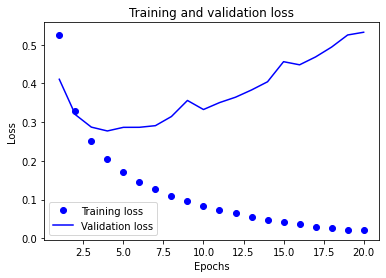

In [ ]:
# losses 
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]             
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Confirmation loss began to increase after the third era. As a result, the remodeling is carried out using the third and fourth epochs.

Plotting the training and validation accuracy



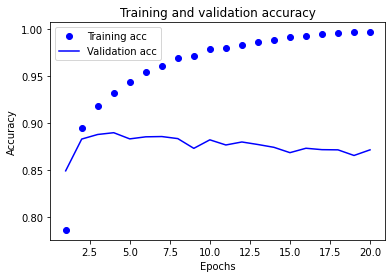

In [ ]:
# accuracy 
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]                     
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The graphs above show that the lowest validation loss and optimum validation accuracy occur at 3 to 5 epochs. Then we notice two patterns.

* Validation loss rises, while training loss falls.
* The certification accuracy falls while the training accuracy rises.

The preceding consequences imply that while the model improves at classifying the training data, it consistently makes worse forecasts when it meets new and unknown data, indicating overfitting. After the fifth epoch, the algorithm starts to match the training data too closely.

To resolve overfitting, the epoch count is decreased to between 3 and 5 epochs. The epochs may differ based on the machine and the character of randomly allocated weights.

Retraining our model



In [ ]:


model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=3, batch_size=512)     
results = model.evaluate(x_test, y_test)

Epoch 1/3
49/49 [==============================] - 2s 37ms/step - loss: 0.4683 - accuracy: 0.8092
Epoch 2/3
49/49 [==============================] - 3s 52ms/step - loss: 0.2690 - accuracy: 0.9056
Epoch 3/3
782/782 [==============================] - 3s 3ms/step - loss: 0.2819 - accuracy: 0.8885


**<b>Result</b>**

The model was trained for 20 epochs and obtained a test accuracy of 88.72%. To illustrate the findings, the model's training and validation loss and accuracy were plotted on graphs. It was discovered that the training and confirmation precision grew concurrently with each epoch, while the loss decreased. Furthermore, the training accuracy was found to be reliably greater than the validation accuracy, indicating that the model is slightly overfitting.

In [ ]:
results


[0.28187671303749084, 0.8885200023651123]

1. You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.


In this report, we will examine two neural networks with various designs to see how the number of hidden layers affects model accuracy.

The first neural network has only one hidden layer with 16 nodes and uses the ReLU activation function. The output layer is composed of only one node and employs the sigmoid activation function. RMSprop is the algorithm used, and binary cross-entropy is the loss function. The group size has been fixed to 512, and the number of epochs to 20.


The second neural network, like the first, has three hidden layers with 16 nodes each and employs the ReLU activation function. The output layer is configured similarly to the first neural network. RMSprop is the algorithm used, and binary cross-entropy is the loss function. The group size has been fixed to 512, and the number of epochs to 20.

In [ ]:
# Three hidden layers and one relu activation function model
model_13 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# one hidden layer and one relu activation function model
model_11 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
#RMSProp and binary cross entropy for both models
model_13.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model_11.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
# Fitting model with 20 epochs and 512 batch size
history_13 = model_13.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_11 = model_11.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 61ms/step - loss: 0.5332 - accuracy: 0.7586 - val_loss: 0.4323 - val_accuracy: 0.8132
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3073 - accuracy: 0.8925 - val_loss: 0.3243 - val_accuracy: 0.8690
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2260 - accuracy: 0.9227 - val_loss: 0.3023 - val_accuracy: 0.8766
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1780 - accuracy: 0.9397 - val_loss: 0.2784 - val_accuracy: 0.8915
Epoch 5/20
30/30 [==============================] - 2s 61ms/step - loss: 0.1513 - accuracy: 0.9478 - val_loss: 0.2845 - val_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 2s 53ms/step - loss: 0.1244 - accuracy: 0.9579 - val_loss: 0.3343 - val_accuracy: 0.8729
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1037 - accuracy: 0.9667 - val_loss: 0.3283 - val_accuracy: 0.8812
Epoch 8/20
30

Plotting training and validation loss



In [ ]:
historyp_13 = history_13.history
historyp_13.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
historyp_11 = history_11.history
historyp_11.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting training and testing loss



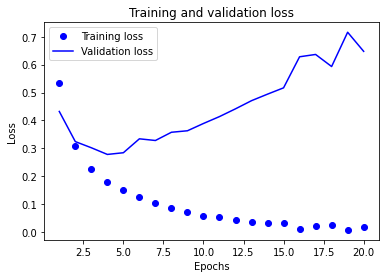

In [ ]:
# Losses
historyp_13 = history_13.history
loss_values3 = historyp_13["loss"]
val_loss_values3 = historyp_13["val_loss"]            
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values3, "bo", label="Training loss")
plt.plot(epochs, val_loss_values3, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Here, the minimum validation loss is observed at 5th epoch



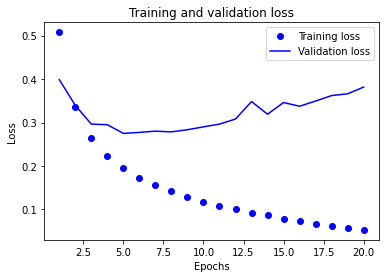

In [ ]:
#Losses
historyp_11 = history_11.history
loss_values1 = historyp_11["loss"]
val_loss_values1 = historyp_11["val_loss"]           
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values1, "bo", label="Training loss")
plt.plot(epochs, val_loss_values1, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Here, the minimum validation loss is observed at 5th epoch

Plotting training and testing accuracy

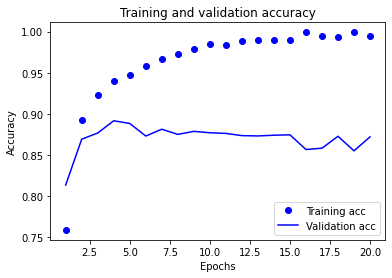

In [ ]:
#Accuracy
plt.clf()
acc3 = historyp_13["accuracy"]
val_acc3 = historyp_13["val_accuracy"]           
plt.plot(epochs, acc3, "bo", label="Training acc")
plt.plot(epochs, val_acc3, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Here, the maximum validation accuracy is observed at 5th epoch



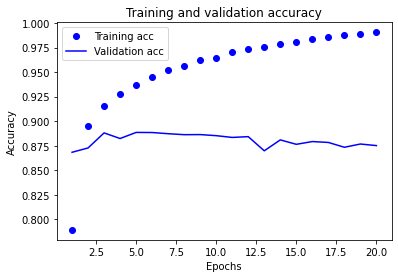

In [ ]:
#Accuracy
plt.clf()
acc1 = historyp_11["accuracy"]
val_acc1 = historyp_11["val_accuracy"]          
plt.plot(epochs, acc1, "bo", label="Training acc")
plt.plot(epochs, val_acc1, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Here, the maximum vallidation accuracy is observed at 5th epoch.



**<b>Results:</b>**

Both models are trained on the same dataset, and their performance is evaluated on the validation set, which is different from the training set. The following table shows the accuracy of both neural networks on the validation and test datasets.

Model	
One	 Validation Set : 0.8868	Accuracy on Test Set : 0.8744

Three	Validation Set : 0.8824	 Accuracy on Test Set : 0.8716

From the table above, we can see that the neural network with one hidden layer performed better than the neural network with three hidden layers. The difference in accuracy is relatively small, but it is consistent on both the validation and test datasets.



2. Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.

In [ ]:
#2 hidden layers and 32 and 64 nodes model
model_2 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
#RMSProp and binary cross entropy 
model_2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
# Fitting model with 20 epochs and 512 batch size
history2 = model_2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 92ms/step - loss: 0.5350 - accuracy: 0.7552 - val_loss: 0.3825 - val_accuracy: 0.8602
Epoch 2/20
30/30 [==============================] - 1s 45ms/step - loss: 0.3096 - accuracy: 0.8905 - val_loss: 0.2935 - val_accuracy: 0.8858
Epoch 3/20
30/30 [==============================] - 2s 57ms/step - loss: 0.2290 - accuracy: 0.9164 - val_loss: 0.2756 - val_accuracy: 0.8889
Epoch 4/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1822 - accuracy: 0.9356 - val_loss: 0.3438 - val_accuracy: 0.8621
Epoch 5/20
30/30 [==============================] - 2s 57ms/step - loss: 0.1500 - accuracy: 0.9473 - val_loss: 0.2923 - val_accuracy: 0.8843
Epoch 6/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1266 - accuracy: 0.9568 - val_loss: 0.3869 - val_accuracy: 0.8562
Epoch 7/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1029 - accuracy: 0.9661 - val_loss: 0.3420 - val_accuracy: 0.8777
Epoch 8/20
30

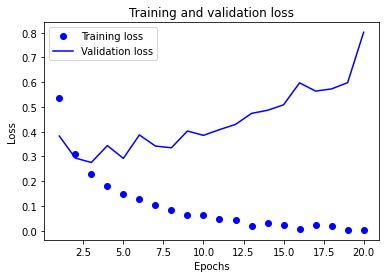

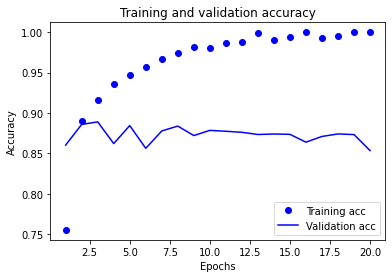

In [ ]:
historyp2 = history2.history
loss_values = historyp2["loss"]
val_loss_values = historyp2["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = historyp2["accuracy"]
val_acc = historyp2["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
     

The minimum validation loss is observed at 3rd epoch and maximum validation accuracy is observed at 3rd and 4th epochs.

3. Try using the mse loss function instead of binary_crossentropy.



In [ ]:
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


In [ ]:
#RMSProp and mse loss function 
model_3.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [ ]:
# Fitting model with 20 epochs and 512 batch size
history3 = model_3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 59ms/step - loss: 0.1857 - accuracy: 0.7639 - val_loss: 0.1331 - val_accuracy: 0.8627
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1091 - accuracy: 0.8842 - val_loss: 0.1049 - val_accuracy: 0.8736
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0826 - accuracy: 0.9055 - val_loss: 0.0914 - val_accuracy: 0.8853
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0670 - accuracy: 0.9255 - val_loss: 0.0917 - val_accuracy: 0.8792
Epoch 5/20
30/30 [==============================] - 2s 61ms/step - loss: 0.0580 - accuracy: 0.9335 - val_loss: 0.0870 - val_accuracy: 0.8842
Epoch 6/20
30/30 [==============================] - 2s 50ms/step - loss: 0.0486 - accuracy: 0.9467 - val_loss: 0.0832 - val_accuracy: 0.8853
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0428 - accuracy: 0.9557 - val_loss: 0.0856 - val_accuracy: 0.8820
Epoch 8/20
30

Plotting training and testing loss



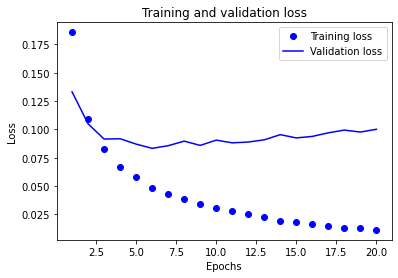

In [ ]:
#Losses
historyp3 = history3.history
loss_values = historyp3["loss"]
val_loss_values = historyp3["val_loss"]             
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Here, the minimum validation loss is observed in 3rd epoch.



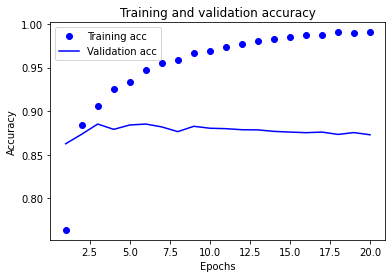

In [ ]:
#Accuracy
plt.clf()
acc = historyp3["accuracy"]
val_acc = historyp3["val_accuracy"]            
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Maximum accuracy is seen in 2nd and 3rd epochs



4. Using the tanh activation 

In [ ]:
#tanh activation function model
model_4 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
#RMSProp and binary cross entropy 
model_4.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [ ]:
# Fitting model with 20 epochs and 512 batch size
history4 = model_4.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 77ms/step - loss: 0.1676 - accuracy: 0.7797 - val_loss: 0.1144 - val_accuracy: 0.8699
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0920 - accuracy: 0.8945 - val_loss: 0.0907 - val_accuracy: 0.8860
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0681 - accuracy: 0.9179 - val_loss: 0.0842 - val_accuracy: 0.8863
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0527 - accuracy: 0.9379 - val_loss: 0.0836 - val_accuracy: 0.8855
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0443 - accuracy: 0.9479 - val_loss: 0.0934 - val_accuracy: 0.8747
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0353 - accuracy: 0.9611 - val_loss: 0.0907 - val_accuracy: 0.8795
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0318 - accuracy: 0.9633 - val_loss: 0.0890 - val_accuracy: 0.8819
Epoch 8/20
30

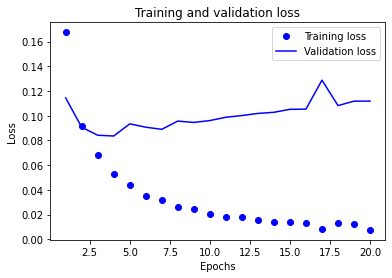

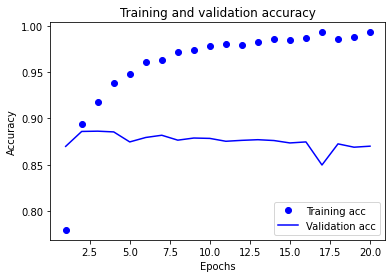

In [ ]:

historyp4 = history4.history
loss_values = historyp4["loss"]
val_loss_values = historyp4["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = historyp4["accuracy"]
val_acc = historyp4["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

Maximum validation accuracy is seen in 3rd epoch where as Minimum validation loss is also seen in 3rd epoch



In [ ]:
results

[0.28187671303749084, 0.8885200023651123]

5. Using technique we studied in class

In [ ]:
model_5 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
#RMSProp and binary cross entropy 
model_5.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
# Fitting model with 20 epochs and 512 batch size
history5 = model_5.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 68ms/step - loss: 0.5308 - accuracy: 0.7466 - val_loss: 0.3815 - val_accuracy: 0.8537
Epoch 2/20
30/30 [==============================] - 1s 49ms/step - loss: 0.3213 - accuracy: 0.8803 - val_loss: 0.2947 - val_accuracy: 0.8834
Epoch 3/20
30/30 [==============================] - 2s 71ms/step - loss: 0.2454 - accuracy: 0.9091 - val_loss: 0.2783 - val_accuracy: 0.8873
Epoch 4/20
30/30 [==============================] - 2s 58ms/step - loss: 0.1975 - accuracy: 0.9291 - val_loss: 0.3427 - val_accuracy: 0.8628
Epoch 5/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1598 - accuracy: 0.9411 - val_loss: 0.2884 - val_accuracy: 0.8863
Epoch 6/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1287 - accuracy: 0.9553 - val_loss: 0.3660 - val_accuracy: 0.8649
Epoch 7/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1122 - accuracy: 0.9598 - val_loss: 0.3265 - val_accuracy: 0.8816
Epoch 8/20
30

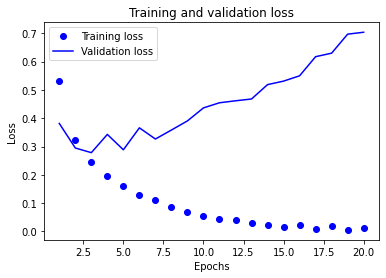

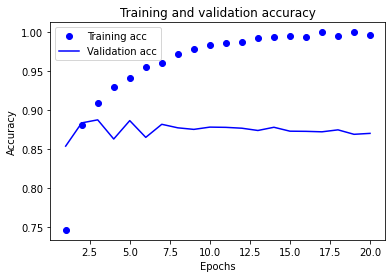

In [ ]:
#Losses
historyp5 = history5.history
loss_values = historyp5["loss"]
val_loss_values = historyp5["val_loss"]        
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Accuracy
plt.clf()
acc = historyp5["accuracy"]    
val_acc = historyp5["val_accuracy"]            
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Maximum accuracy and minimum validation loss is seen in 3rd epoch 


In [ ]:
results

[0.28187671303749084, 0.8885200023651123]